In [59]:
import numpy as np
import pandas as pd

In [60]:
df = pd.read_csv(r"C:\Users\91973\Desktop\Data_Science\Kaggle_projects\Diabetes_Prediction\diabetes.csv")

In [61]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [62]:
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.nan)

In [63]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [64]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [65]:
imp = IterativeImputer(max_iter = 10,random_state=0)
x = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']]
x = imp.fit_transform(x)

In [66]:
print(x)

[[148.          72.          35.         212.34744625  33.6       ]
 [ 85.          66.          29.          66.40720823  26.6       ]
 [183.          64.          21.48649411 272.95443233  23.3       ]
 ...
 [121.          72.          23.         112.          26.2       ]
 [126.          60.          26.46121496 162.79354633  30.1       ]
 [ 93.          70.          31.          88.18989483  30.4       ]]


In [67]:
x = pd.DataFrame(x)

In [68]:
x.rename(columns={0:'Glucose_1',1:'BloodPressure_1',2:'SkinThickness_1',3:'Insulin_1',4:'BMI_1'},inplace = True)

In [69]:
x.head()

,Glucose_1,BloodPressure_1,SkinThickness_1,Insulin_1,BMI_1
0,148.0,72.0,35.000000,212.347446,33.6
1,85.0,66.0,29.000000,66.407208,26.6
2,183.0,64.0,21.486494,272.954432,23.3
3,89.0,66.0,23.000000,94.000000,28.1
4,137.0,40.0,35.000000,168.000000,43.1


In [70]:
df = pd.concat([df,x],axis = 1)

In [71]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Glucose_1,BloodPressure_1,SkinThickness_1,Insulin_1,BMI_1
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1,148.0,72.0,35.000000,212.347446,33.6
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0,85.0,66.0,29.000000,66.407208,26.6
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1,183.0,64.0,21.486494,272.954432,23.3
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,89.0,66.0,23.000000,94.000000,28.1
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,137.0,40.0,35.000000,168.000000,43.1


In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\91973\Anaconda3\lib\site-packages\seaborn\distributions.py:952: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  scout, = self.ax.plot([], [], **plot_kws)
C:\Users\91973\Anaconda3\lib\site-packages\seaborn\distributions.py:995: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  artist, = ax.plot(support, density, **artist_kws)
C:\Users\91973\Anaconda3\lib\site-packages\seaborn\distributions.py:952: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  scout, = self.ax.plot([], [], **plot_kws)
C:\Users\91973\Anaconda3\lib\site-packages\seaborn\distributions.py:995: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  artist, = ax.plot(support, den

Text(0, 0.5, 'Probability Density')

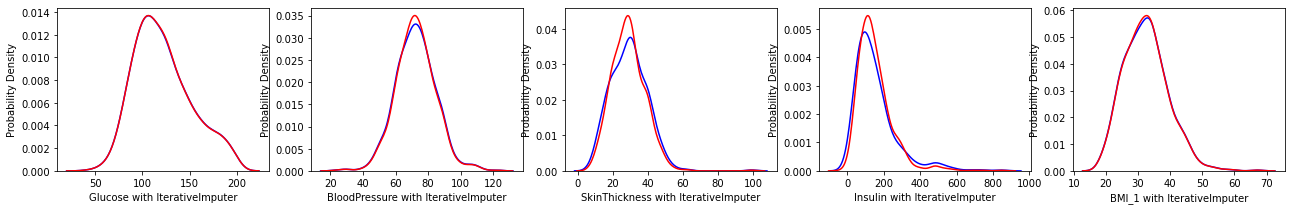

In [86]:
plt.figure(figsize=(22,3))
plt.subplot(1,5,1)
sns.kdeplot(df.Glucose,color = 'b',shade=False,Label='Glucose')
sns.kdeplot(df.Glucose_1,color = 'r',shade=False,Label='Glucose_1')
plt.xlabel('Glucose with IterativeImputer')
plt.ylabel('Probability Density')
plt.subplot(1,5,2)
sns.kdeplot(df.BloodPressure,color = 'b',shade=False,Label='BloodPressure')
sns.kdeplot(df.BloodPressure_1,color = 'r',shade=False,Label='BloodPressure_1')
plt.xlabel('BloodPressure with IterativeImputer')
plt.ylabel('Probability Density')
plt.subplot(1,5,3)
sns.kdeplot(df.SkinThickness,color = 'b',shade=False,Label='SkinThickness')
sns.kdeplot(df.SkinThickness_1,color = 'r',shade=False,Label='SkinThickness_1')
plt.xlabel('SkinThickness with IterativeImputer')
plt.ylabel('Probability Density')
plt.subplot(1,5,4)
sns.kdeplot(df.Insulin,color = 'b',shade=False,Label='Insulin')
sns.kdeplot(df.Insulin_1,color = 'r',shade=False,Label='Insulin_1')
plt.xlabel('Insulin with IterativeImputer')
plt.ylabel('Probability Density')
plt.subplot(1,5,5)
sns.kdeplot(df.BMI,color = 'b',shade=False,Label='BMI')
sns.kdeplot(df.BMI_1,color = 'r',shade=False,Label='BMI_1')
plt.xlabel('BMI_1 with IterativeImputer')
plt.ylabel('Probability Density')

In [87]:
df.drop(['Glucose','BloodPressure','SkinThickness','Insulin','BMI'],axis=1,inplace = True)

In [88]:
df.rename(columns={'Glucose_1':'Glucose','BloodPressure_1':'BloodPressure','SkinThickness_1':'SkinThickness','Insulin_1':'Insulin','BMI_1':'BMI'},inplace = True)

In [89]:
df.isnull().sum()

Pregnancies                 0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
dtype: int64

In [90]:
df.head()

,Pregnancies,DiabetesPedigreeFunction,Age,Outcome,Glucose,BloodPressure,SkinThickness,Insulin,BMI
0,6,0.627,50,1,148.0,72.0,35.000000,212.347446,33.6
1,1,0.351,31,0,85.0,66.0,29.000000,66.407208,26.6
2,8,0.672,32,1,183.0,64.0,21.486494,272.954432,23.3
3,1,0.167,21,0,89.0,66.0,23.000000,94.000000,28.1
4,0,2.288,33,1,137.0,40.0,35.000000,168.000000,43.1
